In [75]:
cd drive/MyDrive/multitask_da/data/PH2/

/content/drive/MyDrive/multitask_da/data/PH2


In [188]:
import os
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import cv2
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [164]:
df = pd.read_csv('label.txt')
df.drop('Histological_Diagnosis', axis=1, inplace=True)

In [165]:
df

,Name,Clinical_Diagnosis
0,IMD003,0
1,IMD009,0
2,IMD016,0
3,IMD022,0
4,IMD024,0
...,...,...
195,IMD424,2
196,IMD425,2
197,IMD426,2
198,IMD429,2


In [166]:
dataset = os.listdir('PH2_Dataset_images')
dataset

['IMD015',
 'IMD006',
 'IMD010',
 'IMD004',
 'IMD009',
 'IMD014',
 'IMD003',
 'IMD013',
 'IMD008',
 'IMD002',
 'IMD024',
 'IMD022',
 'IMD020',
 'IMD016',
 'IMD025',
 'IMD019',
 'IMD018',
 'IMD023',
 'IMD017',
 'IMD021',
 'IMD031',
 'IMD035',
 'IMD039',
 'IMD030',
 'IMD033',
 'IMD038',
 'IMD036',
 'IMD032',
 'IMD027',
 'IMD037',
 'IMD042',
 'IMD050',
 'IMD041',
 'IMD043',
 'IMD048',
 'IMD045',
 'IMD047',
 'IMD044',
 'IMD049',
 'IMD040',
 'IMD057',
 'IMD076',
 'IMD061',
 'IMD080',
 'IMD075',
 'IMD064',
 'IMD065',
 'IMD058',
 'IMD078',
 'IMD063',
 'IMD088',
 'IMD103',
 'IMD092',
 'IMD101',
 'IMD091',
 'IMD108',
 'IMD107',
 'IMD090',
 'IMD085',
 'IMD105',
 'IMD134',
 'IMD112',
 'IMD120',
 'IMD118',
 'IMD137',
 'IMD135',
 'IMD133',
 'IMD132',
 'IMD126',
 'IMD125',
 'IMD140',
 'IMD144',
 'IMD138',
 'IMD142',
 'IMD143',
 'IMD147',
 'IMD146',
 'IMD149',
 'IMD139',
 'IMD150',
 'IMD160',
 'IMD159',
 'IMD152',
 'IMD162',
 'IMD156',
 'IMD157',
 'IMD154',
 'IMD161',
 'IMD155',
 'IMD153',
 'IMD177',

In [168]:
test_set = ['IMD016',
'IMD035',
'IMD045',
'IMD118',
'IMD134',
'IMD147',
'IMD162',
'IMD200',
'IMD041',
'IMD108',
'IMD196',
'IMD204',
'IMD365',
'IMD374',
'IMD385',
'IMD394',
'IMD004',
'IMD033',
'IMD048',
'IMD076',
'IMD137',
'IMD139',
'IMD164',
'IMD210',
'IMD006',
'IMD023',
'IMD226',
'IMD278',
'IMD306',
'IMD331',
'IMD382',
'IMD431',
'IMD064',
'IMD088',
'IMD211',
'IMD285',
'IMD405',
'IMD419',
'IMD423',
'IMD429']

train_set = [x for x in dataset if x not in test_set]
len(train_set)

160

In [170]:
def onehotencoder(x):
  if x == 0:
    return [1, 0, 0]
  elif x == 1:
    return [0, 1, 0]
  else:
    return [0, 0, 1]

df['Clinical_Diagnosis'] = df['Clinical_Diagnosis'].apply(onehotencoder)

In [177]:
df

,Name,Clinical_Diagnosis
0,IMD003,"[1, 0, 0]"
1,IMD009,"[1, 0, 0]"
2,IMD016,"[1, 0, 0]"
3,IMD022,"[1, 0, 0]"
4,IMD024,"[1, 0, 0]"
...,...,...
195,IMD424,"[0, 0, 1]"
196,IMD425,"[0, 0, 1]"
197,IMD426,"[0, 0, 1]"
198,IMD429,"[0, 0, 1]"


In [180]:
df.loc[df['Name'] == 'IMD435', 'Clinical_Diagnosis'].iloc[0]

[0, 0, 1]

# Train set

In [195]:
skin_images = []
mask_labels = []
class_labels = []

c = 0
for i in tqdm(train_set):
  skin_image = cv2.imread('PH2_Dataset_images/' + i + '/' + i + '_Dermoscopic_Image/' + i + '.bmp')
  skin_image = cv2.cvtColor(skin_image, cv2.COLOR_BGR2RGB)
  skin_image = skin_image/255
  skin_image = cv2.resize(skin_image, (256, 256), interpolation=cv2.INTER_AREA)
  skin_images.append(skin_image)

  mask_label = cv2.imread('PH2_Dataset_images/' + i + '/' + i + '_lesion/' + i + '_lesion.bmp', cv2.IMREAD_GRAYSCALE)
  mask_label = mask_label/255
  mask_label = cv2.resize(mask_label, (256, 256), interpolation=cv2.INTER_NEAREST)
  mask_labels.append(mask_label)

  class_labels.append(df.loc[df['Name'] == i, 'Clinical_Diagnosis'].iloc[0])

100%|██████████| 160/160 [06:03<00:00,  2.27s/it]


In [196]:
skin_images = np.array(skin_images)
mask_labels = np.array(mask_labels)
class_labels = np.array(class_labels)

In [233]:
ls ../../loaded_data/PH2/train/

test/  train/


In [234]:
np.save('../../loaded_data/PH2/train/skin_images.npy', skin_images)
np.save('../../loaded_data/PH2/train/mask_labels.npy', mask_labels)
np.save('../../loaded_data/PH2/train/class_labels.npy', class_labels)

# Test set

In [260]:
skin_images = []
mask_labels = []
class_labels = []

c = 0
for i in tqdm(test_set):
  skin_image = cv2.imread('PH2_Dataset_images/' + i + '/' + i + '_Dermoscopic_Image/' + i + '.bmp')
  skin_image = cv2.cvtColor(skin_image, cv2.COLOR_BGR2RGB)
  skin_image = skin_image/255
  skin_image = cv2.resize(skin_image, (256, 256), interpolation=cv2.INTER_AREA)
  skin_images.append(skin_image)

  mask_label = cv2.imread('PH2_Dataset_images/' + i + '/' + i + '_lesion/' + i + '_lesion.bmp', cv2.IMREAD_GRAYSCALE)
  mask_label = mask_label/255
  mask_label = cv2.resize(mask_label, (256, 256), interpolation=cv2.INTER_NEAREST)
  mask_labels.append(mask_label)

  class_labels.append(df.loc[df['Name'] == i, 'Clinical_Diagnosis'].iloc[0])

100%|██████████| 40/40 [01:40<00:00,  2.51s/it]


In [261]:
skin_images = np.array(skin_images)
mask_labels = np.array(mask_labels)
class_labels = np.array(class_labels)

In [283]:
np.save('../../loaded_data/PH2/test/skin_images.npy', skin_images)
np.save('../../loaded_data/PH2/test/mask_labels.npy', mask_labels)
np.save('../../loaded_data/PH2/test/class_labels.npy', class_labels)

In [282]:
class_labels.shape

(40, 3)

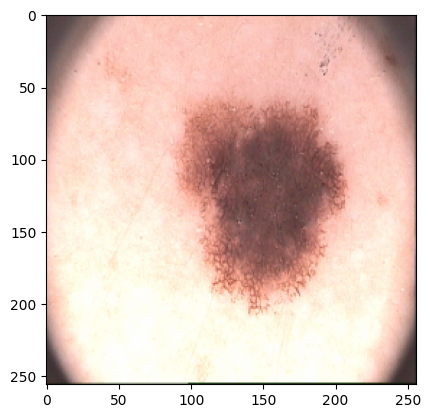

In [272]:
k = 15
plt.imshow(skin_images[k])

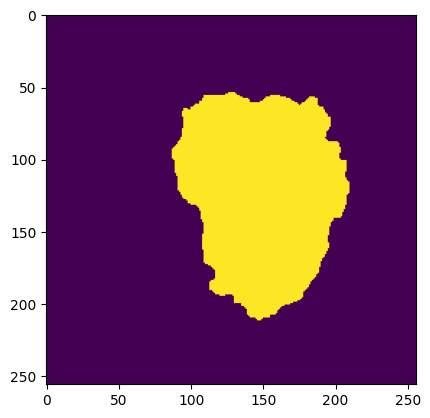

In [273]:
plt.imshow(mask_labels[k])

In [276]:
np.sum(class_labels, axis=0)

array([16, 16,  8])